In [1]:
import matplotlib
print(matplotlib.__path__)

['/home/wck/.local/lib/python3.6/site-packages/matplotlib']


In [2]:
import re

In [3]:
import networkx as nx

In [4]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [5]:
city_location ={}
for line in coordination_source.split('\n'):
    if line.startswith('//'):continue     #将以//开头的行去掉
    if line.strip() == '': continue   #将空行去掉
    
    city = re.findall("name:'(\w+)'", line)[0]    #注意里面单引号，也可以写成.(\w+).；因为.可以匹配除了换行符\n的任意字符，\w智能匹配a-z A-Z 中文 _(下划线)，
    x_y = re.findall(r"Coord:\[(\d+.\d+),\s(\d+.\d+)\]", line)[0]  #当有两个()，则输出列表中的元素是tuple
    x_y = tuple(map(float, x_y))  #将tuple中的字符串改成数字，这里的map高级用法，很值得学习！
    city_location[city] = x_y
    print(city, x_y)


兰州 (103.73, 36.03)
嘉峪关 (98.17, 39.47)
西宁 (101.74, 36.56)
成都 (104.06, 30.67)
石家庄 (114.48, 38.03)
拉萨 (102.73, 25.04)
贵阳 (106.71, 26.57)
武汉 (114.31, 30.52)
郑州 (113.65, 34.76)
济南 (117.0, 36.65)
南京 (118.78, 32.04)
合肥 (117.27, 31.86)
杭州 (120.19, 30.26)
南昌 (115.89, 28.68)
福州 (119.3, 26.08)
广州 (113.23, 23.16)
长沙 (113.0, 28.21)
沈阳 (123.38, 41.8)
长春 (125.35, 43.88)
哈尔滨 (126.63, 45.75)
太原 (112.53, 37.87)
西安 (108.95, 34.27)
北京 (116.46, 39.92)
上海 (121.48, 31.22)
重庆 (106.54, 29.59)
天津 (117.2, 39.13)
呼和浩特 (111.65, 40.82)
南宁 (108.33, 22.84)
银川 (106.27, 38.47)
乌鲁木齐 (87.68, 43.77)
香港 (114.17, 22.28)
澳门 (113.54, 22.19)


In [6]:
import math

In [7]:
def geo_distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371
    
    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [8]:
def get_city_distance(city1, city2):
    return geo_distance(city_location[city1], city_location[city2])

In [9]:
get_city_distance("上海","杭州")

153.5185697155768

In [10]:
import networkx as nx

In [11]:
cities = list(city_location.keys())

In [12]:
city_graph = nx.Graph()

In [13]:
city_graph.add_nodes_from(cities)

In [14]:
%matplotlib inline

In [15]:
import matplotlib.pyplot as plt

In [16]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [17]:
#nx.draw(city_graph, city_location, with_lables=True, node_size=10)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/home/wck/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 20848 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/wck/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 24030 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/wck/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 20848 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/wck/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 24030 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/wck/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 22025 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/wck/.local/lib/python3.6/site-packag

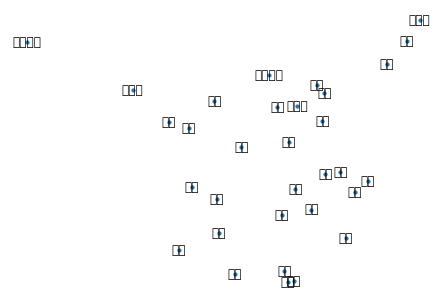

In [18]:
nx.draw(city_graph, city_location, with_labels=True, node_size=10)

In [19]:
threshold = 300

In [20]:
from collections import defaultdict 

In [21]:
cities_connection = defaultdict(list)   #给cities_connection中新出现的key默认赋一个空列表，这样在不初始化的时候就可以直接用，而不会出现keyError

In [22]:
for c1 in cities:
    for c2 in cities:
        if c1==c2: continue
        
        if get_city_distance(c1, c2) < threshold:
            cities_connection[c1].append(c2)

In [23]:
cities_connection['兰州']

['西宁', '成都', '银川']

In [24]:
for key, value in cities_connection.items():
    print("key:{},value:{}".format(key, value))

key:兰州,value:['西宁', '成都', '银川']
key:西宁,value:['兰州', '成都', '拉萨']
key:成都,value:['兰州', '西宁', '拉萨', '重庆']
key:石家庄,value:['郑州', '济南', '太原', '北京']
key:拉萨,value:['西宁', '成都']
key:贵阳,value:['重庆', '南宁']
key:武汉,value:['郑州', '南昌', '长沙']
key:郑州,value:['石家庄', '武汉', '长沙', '太原']
key:济南,value:['石家庄', '合肥', '北京', '天津']
key:南京,value:['合肥', '杭州']
key:合肥,value:['济南', '南京', '南昌']
key:杭州,value:['南京', '福州', '上海']
key:南昌,value:['武汉', '合肥']
key:福州,value:['杭州']
key:广州,value:['长沙', '香港', '澳门']
key:长沙,value:['武汉', '郑州', '广州', '香港', '澳门']
key:沈阳,value:['长春']
key:长春,value:['沈阳', '哈尔滨']
key:哈尔滨,value:['长春']
key:太原,value:['石家庄', '郑州', '呼和浩特']
key:北京,value:['石家庄', '济南', '天津']
key:上海,value:['杭州']
key:重庆,value:['成都', '贵阳', '银川']
key:天津,value:['济南', '北京']
key:呼和浩特,value:['太原']
key:南宁,value:['贵阳']
key:银川,value:['兰州', '重庆']
key:香港,value:['广州', '长沙', '澳门']
key:澳门,value:['广州', '长沙', '香港']


/home/wck/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


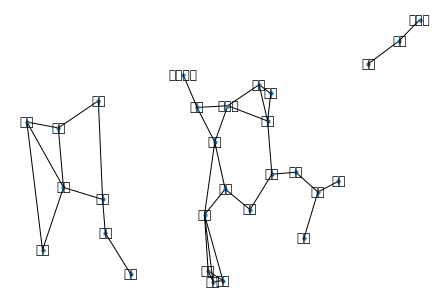

In [25]:
cities_connection_graph = nx.Graph(cities_connection)
nx.draw(cities_connection_graph, city_location, with_labels=True, node_size=10)

In [26]:
def is_goal(desitination):    #判断是否到达目的地
    def _warp(current_path):
        return current_path[-1] == desitination
    return _warp

In [27]:
def search(graph, start, is_goal, search_strategy):
    pathes = [[start]]
    seen = set()
    while pathes:
        path = pathes.pop(0)
        frontier = path[-1] #取出最后一个元素，因为只有最后一个元素需要检查
        
        if frontier in seen: continue
        
        successor = graph[frontier]
        
        for city in successor:
            if city in path: continue
                
            new_path = path+[city]
            
            pathes.append(new_path)
            
            if is_goal(new_path):return new_path    #这里由一个问题就是一旦选择了一条路，那么另外的可能性的路就不探索了，使得策略search_search失效，因为只有一条路
        seen.add(frontier)
        pathes = search_strategy(pathes)

In [28]:
search(cities_connection, start='西安', is_goal=is_goal('上海'), search_strategy=lambda n: n)

修正程序，找到所有路径，然后才好用search_strategy

In [29]:

def search(graph, start, is_goal, search_strategy):
    pathes = [[start]]
    seen = set()
    final_pathes = []
    while pathes:
        path = pathes.pop(0)
        frontier = path[-1]   #取出最后一个元素，因为只有最后一个元素需要检查
        
        if frontier in seen: continue
        
        successor = graph[frontier]
        
        for city in successor:
            if city in path: continue
                
            new_path = path+[city]
            
            pathes.append(new_path)
            
            if is_goal(new_path):
                final_pathes.append(new_path)
                #break
                continue
        seen.add(frontier)
        #pathes = search_strategy(pathes)
    return final_pathes

In [30]:
search(cities_connection, start='北京', is_goal=is_goal('济南'), search_strategy=lambda n: n)

[['北京', '济南'], ['北京', '石家庄', '济南'], ['北京', '天津', '济南']]

In [65]:
test_graph = {"a":["b", "e","c"],"b":["a","d","f","c"], "e":["a","c"],"c":["b","a","e","d","f"],"d":["b", "c"],"f":["b","c"]}

In [66]:
test_graph

{'a': ['b', 'e', 'c'],
 'b': ['a', 'd', 'f', 'c'],
 'e': ['a', 'c'],
 'c': ['b', 'a', 'e', 'd', 'f'],
 'd': ['b', 'c'],
 'f': ['b', 'c']}

In [43]:
search(test_graph, start='a', is_goal=is_goal('f'), search_strategy=lambda n: n)

[['a', 'b', 'f'], ['a', 'c', 'f']]

## 自己写的算法，最小边树，也就是最小换乘路线

In [46]:
a = set()
a.add(3)
a

{3}

In [78]:
#my method

def my_search(graph, start, destination):
    seen = set()
    seen.add(start)    #将第一个点标记为已经看到
    l = {}   #是距离start点最少边数
    l[start] = 0
    
    queue = [start]   #队列
    while queue:
        v = queue.pop(0)
        for v_station in graph[v]:
            if v_station not in seen:
                seen.add(v_station)
                l[v_station] = l[v] + 1
                queue.append(v_station)
                if v_station == destination:
                    return l
    
    return "destination is not in graph!" #说明destination不在图中

In [79]:
number_l = my_search(test_graph, start='a',destination="g")
number_l

'destination is not in graph!'

In [87]:
number_l = my_search(test_graph, start='a',destination="f")
number_l

{'a': 0, 'b': 1, 'e': 1, 'c': 1, 'd': 2, 'f': 2}

In [109]:
def find_path(destination, start, graph, l):
    queue = [[destination]]    #这点技巧是为了加入所有最短路径
    best_path = []
    
    while queue:
        v = queue.pop(0)
        path = v[-1]
        for station in graph[path]:
            if l[station] == (l[path]-1):
                new_path = v + [station]
                queue.append(new_path)
                if l[station] == 0:
                    best_path.append(new_path)
                    
    solution_path = []
    for path in best_path:
        rev_path = []
        for station in reversed(path):
            rev_path.append(station)
        solution_path.append(rev_path)
    
    return solution_path     
         

In [108]:
find_path("f","a",test_graph, number_l)

[]

In [102]:
test = {"a":["b",'c'],"b":['a','d','e'],'c':['a','e'],'d':['b','f'],'e':['b','c','f'],'f':['d','e']}
test

{'a': ['b', 'c'],
 'b': ['a', 'd', 'e'],
 'c': ['a', 'e'],
 'd': ['b', 'f'],
 'e': ['b', 'c', 'f'],
 'f': ['d', 'e']}

In [105]:
number_l = my_search(test, start='a',destination="f")
number_l

{'a': 0, 'b': 1, 'c': 1, 'd': 2, 'e': 2, 'f': 3}

In [110]:
find_path("f","a",test, number_l)

[['a', 'b', 'd', 'f'], ['a', 'b', 'e', 'f'], ['a', 'c', 'e', 'f']]

In [31]:
def search(graph, start, is_goal, search_strategy):
    pathes = [[start]]
    seen = set()
    final_pathes = []
    while pathes:
        path = pathes.pop(0)
        frontier = path[-1]   #取出最后一个元素，因为只有最后一个元素需要检查
        
        if frontier in seen: continue
        
        successor = graph[frontier]
        
        for city in successor:
            if city in path: continue
                
            new_path = path+[city]
            
            pathes.append(new_path)
            
            if is_goal(new_path):
                final_pathes.append(new_path)
                #break
                continue
        seen.add(frontier)
        #pathes = search_strategy(pathes)   #如果在这里排序就是局部最优，每一步取最近的距离，就是贪心算法，不一定是最优的
    return search_strategy(final_pathes)

In [32]:
search(cities_connection, start='北京', is_goal=is_goal('济南'), search_strategy=lambda n: n)

[['北京', '济南'], ['北京', '石家庄', '济南'], ['北京', '天津', '济南']]

添加策略，一个是最短换乘，一个是最短路径

In [53]:
def transfer_shortest_station(pathes): 
    pathes_sorted = sorted(pathes, key=len)
    print(pathes_sorted)
    return pathes_sorted[0]

In [54]:
search(cities_connection, start='北京', is_goal=is_goal('济南'), search_strategy=transfer_shortest_station)

[['北京', '济南'], ['北京', '石家庄', '济南'], ['北京', '天津', '济南']]


['北京', '济南']

In [55]:
def distance_shortest_station(pathes):
    print(pathes)
    path_distace = [0 for i in range(len(pathes))]
    for index,path in enumerate(pathes):
        previous_city = path[0]
        for city in path:
            path_distace[index] += get_city_distance(previous_city,city)
            previous_city = city
    #参考他人，更简洁的做法是
       # for i in range(1,len(path)):
       #
    path_distace[index] += get_city_distance(path[i-1],path[i])
            
    best_path_index = sorted(enumerate(path_distace), key=lambda x:x[1])[0][0]    #将所有的路径找出来，然后再计算所有路径的距离，再排序，这么做就是全局最有
    return pathes[best_path_index]
        

In [59]:
search(cities_connection, start='北京', is_goal=is_goal('济南'), search_strategy=distance_shortest_station)

[['北京', '济南'], ['北京', '石家庄', '济南'], ['北京', '天津', '济南']]


['北京', '济南']

In [57]:
a = [['北京', '济南'], ['北京', '石家庄', '济南'], ['北京', '天津', '济南']]
for i,j in enumerate(a):
    print(i,j)

0 ['北京', '济南']
1 ['北京', '石家庄', '济南']
2 ['北京', '天津', '济南']


In [58]:
get_city_distance("上海","杭州")

153.5185697155768

In [39]:
def dfs(graph, start):
    """
    deapth first search
    """
    visit = [start]
    seen = set()
    
    while visit:
        frontier = visit.pop()   #取出visit.pop(-1)
        
        if frontier in seen: continue
            
        for successor in graph[frontier]:
            print(successor)
            if successor in seen: continue
                
            visit.append(successor)
            
        seen.add(frontier)
        
    return

In [40]:
#dfs(cities_connection, "西安")

In [41]:
def dfs(graph, start):
    """
    breadth first search
    """
    visit = [start]
    seen = ()
    
    while visit:
        frontier = visit.pop(0)
        if frontier in seen: continue
            
        for successor in graph[frontier]:
            if successor in seen:
                continue
            visit.append(successor)
            
        seen.add(frontier)
        
    return


网络爬虫

In [2]:
import requests

In [3]:
url = "https://movie.douban.com/subject/27060077/?tag=%E7%83%AD%E9%97%A8&from=gaia_video"

In [5]:
requests.get(url)

<Response [200]>

当上条语句结果是<Response [200]>，说明网络是通的

In [6]:
response = requests.get(url)

In [7]:
response.text

'<!DOCTYPE html>\n<html lang="zh-cmn-Hans" class="">\n<head>\n    <meta http-equiv="Content-Type" content="text/html; charset=utf-8">\n    <meta name="renderer" content="webkit">\n    <meta name="referrer" content="always">\n    <meta name="google-site-verification" content="ok0wCgT20tBBgo9_zat2iAcimtN4Ftf5ccsh092Xeyw" />\n    <title>\n        绿皮书 (豆瓣)\n</title>\n    \n    <meta name="baidu-site-verification" content="cZdR4xxR7RxmM4zE" />\n    <meta http-equiv="Pragma" content="no-cache">\n    <meta http-equiv="Expires" content="Sun, 6 Mar 2005 01:00:00 GMT">\n    \n    <link rel="apple-touch-icon" href="https://img3.doubanio.com/f/movie/d59b2715fdea4968a450ee5f6c95c7d7a2030065/pics/movie/apple-touch-icon.png">\n    <link href="https://img3.doubanio.com/f/shire/52c9997d6d42db58eab418e976a14d5f3eff981e/css/douban.css" rel="stylesheet" type="text/css">\n    <link href="https://img3.doubanio.com/f/shire/ae3f5a3e3085968370b1fc63afcecb22d3284848/css/separation/_all.css" rel="stylesheet" typ

In [8]:
pattern = re.compile(r'<a href="https://(movie\.douban\.com/subject/\d+/\?from=subject-page)" class="" >')

In [11]:
other_like = pattern.findall(response.text)

In [13]:
for like in other_like:
    print(like)

movie.douban.com/subject/6786002/?from=subject-page
movie.douban.com/subject/3011091/?from=subject-page
movie.douban.com/subject/26628357/?from=subject-page
movie.douban.com/subject/26752088/?from=subject-page
movie.douban.com/subject/1295644/?from=subject-page
movie.douban.com/subject/27110296/?from=subject-page
movie.douban.com/subject/21937445/?from=subject-page
movie.douban.com/subject/1292064/?from=subject-page
movie.douban.com/subject/27622447/?from=subject-page
movie.douban.com/subject/5912992/?from=subject-page
